In [1]:
#Basic Dependencies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read training Data
df_train = pd.read_csv("Train.csv")
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
#Read testing data
df_test = pd.read_csv("Test.csv")
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [6]:
df_train.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
#Column Types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [8]:
#Basic Stats
df_train.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [9]:
print(df_train.shape)
print(df_test.shape)

(284780, 8)
(122049, 7)


In [10]:
data = df_train

In [11]:
#Check for Missing Values
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
#Seperate Categorical and Numerical Columns
cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
print(num_cols)

['InvoiceDate']
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']


In [13]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: data[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('InvoiceDate', 19451)]

In [14]:
#Drop irrelavent columns
data1 = data.drop(['InvoiceDate','InvoiceNo'],1, inplace= False)
data1.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1583,144,3,3.75,14056.0,35
1,1300,3682,6,1.95,13098.0,35
2,2178,1939,4,5.95,15044.0,35
3,2115,2983,1,0.83,15525.0,35
4,1210,2886,12,1.65,13952.0,35


In [15]:
#Check for skewness in the dataset
data1.skew()

StockCode        0.271247
Description     -0.133967
Quantity         0.226115
UnitPrice      438.340508
CustomerID       0.029524
Country         -3.050125
dtype: float64

438.3405083657168

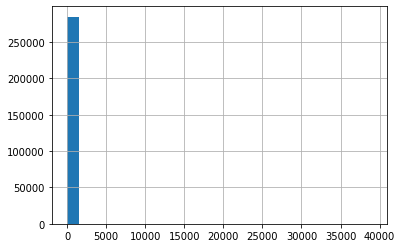

In [16]:
data1.UnitPrice.hist(bins = 25)
print()
data1.UnitPrice.skew()
#Highly skewed scaling needs to done before applying any regression model

In [17]:
corr_matrix = data1.corr(method='pearson')
corr_matrix

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
StockCode,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


In [18]:
#corrleation with area
corr_matrix.UnitPrice.sort_values(ascending=False)

UnitPrice      1.000000
StockCode      0.020073
Description   -0.000424
Quantity      -0.000924
CustomerID    -0.004932
Country       -0.005378
Name: UnitPrice, dtype: float64

In [19]:
#Take targate variable into y
y = data1['UnitPrice']
X = data1.drop('UnitPrice',axis = 1)

from sklearn.preprocessing import PowerTransformer
y = y.values.reshape(-1,1)
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
y = power.fit_transform(y)

In [20]:
# Split data into train and test format
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.990699 (0.010221)
ScaledLASSO: -1.001225 (0.007268)
ScaledEN: -1.001225 (0.007268)
ScaledKNN: -0.332392 (0.005886)
ScaledCART: -0.072603 (0.004010)
ScaledGBM: -0.521044 (0.003949)


In [23]:
# Using K_Nearest neighbour regressor
# running for different K values to know which yields the max accuracy.
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))    

In [24]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 3, Max Accuracy = 82.41356826886529


In [25]:
clf = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test ))   
y_pred = clf.predict(X_test)

0.8241356826886529


In [26]:
import joblib
# save the model to disk
filename = 'KNN_Regressor_MachineHack.sav'
joblib.dump(model, filename)

['KNN_Regressor_MachineHack.sav']

In [27]:
#Read testing data
df_test = pd.read_csv("Test.csv")
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [28]:
data_test = df_test.drop(['InvoiceDate','InvoiceNo'],1, inplace= False)
data_test.head()

,StockCode,Description,Quantity,CustomerID,Country
0,1709,1079,3,16161.0,35
1,510,3457,1,17341.0,35
2,604,694,36,15158.0,35
3,1478,3473,2,16033.0,35
4,3216,871,1,15351.0,35


In [29]:
# apply the whole pipeline to data
results = clf.predict(data_test)

In [30]:
results

array([[-0.18857425],
       [-0.51952138],
       [ 0.8275621 ],
       ...,
       [-0.51952138],
       [ 1.34272634],
       [ 0.90143699]])

In [31]:
result = pd.DataFrame(data=results)
result.head()

,0
0,-0.188574
1,-0.519521
2,0.827562
3,-0.188574
4,1.960363


In [32]:
# Applying inverse power transform to get back original form of unit price
a_inverse_transformed = power.inverse_transform(result)
a_inverse_transformed

array([[1.65      ],
       [1.25      ],
       [3.88417208],
       ...,
       [1.25      ],
       [6.31501274],
       [4.15      ]])

In [33]:
result = pd.DataFrame(data=a_inverse_transformed).round(2)
result.head()

,0
0,1.65
1,1.25
2,3.88
3,1.65
4,12.75


In [37]:
result.to_csv("Price_predictions.csv", index=False)